Individual Planning Report

Project: Predicting Usage of a Video Game Research Server  
Student: Ziyang Shen

In this report, I outline my plan for a data science project using data from a Minecraft research server. I focus on identifying which kinds of players are most likely to contribute large amounts of gameplay data.


In [4]:
library(tidyverse)
players  <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

glimpse(players)
glimpse(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…
Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+

(1) Data Description

The project uses two related datasets.  
`players.csv` contains one row per unique player, with variables describing their experience level, whether they subscribed to the newsletter, hashed email, name, gender, total played hours and age.  
`sessions.csv` contains one row per play session, including the hashed email, start and end times, and numeric timestamps for the start and end of the session.


In [8]:
# Sizes of the datasets
nrow(players); ncol(players)
nrow(sessions); ncol(sessions)

# Means of numeric variables in players.csv
player_means <- players |>
  summarise(across(where(is.numeric),
                   ~ round(mean(.x, na.rm = TRUE), 2))) |>
  pivot_longer(everything(),
               names_to = "variable",
               values_to = "mean")

player_means

[1] 196

[1] 7

[1] 1535

[1] 5

variable,mean
<chr>,<dbl>
played_hours,5.85
Age,21.14


In [13]:

sessions2 <- sessions |>
  mutate(session_length_min = (original_end_time - original_start_time) / (1000 * 60))


session_summary <- sessions2 |>
  group_by(hashedEmail) |>
  summarise(
    total_time_min = sum(session_length_min, na.rm = TRUE),
    n_sessions = n(),
    avg_session_length_min = mean(session_length_min, na.rm = TRUE),
    .groups = "drop")

session_summary

hashedEmail,total_time_min,n_sessions,avg_session_length_min
<chr>,<dbl>,<int>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,166.6667,2,83.33333
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,0.0000,1,0.00000
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,0.0000,1,0.00000
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,666.6667,13,51.28205
0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a,166.6667,2,83.33333
11006065e9412650e99eea4a4aaaf0399bc338006f85e80cc82d18b49f0e2aa4,0.0000,1,0.00000
119f01b9877fc5ea0073d05602a353b91c4b48e4cf02f42bb8d661b46a34b760,0.0000,1,0.00000
18936844e06b6c7871dce06384e2d142dd86756941641ef39cf40a9967ea14e3,1000.0000,41,24.39024
1a2b92f18f36b0b59b41d648d10a9b8b20a2adff550ddbcb8cec2f47d4d881d0,0.0000,1,0.00000


(2) Questions

# Broad question 
Which players are likely to contribute a large amount of gameplay data on the Minecraft research server?

# Specific question  
Can we use players’ session activity and characteristics to predict their total play time on the server?

To investigate this question, I use both `players.csv` and `sessions.csv`. From `sessions.csv`, I summarise each player’s usage with total play time, number of sessions, and average session length based on the `hashedEmail`. From `players.csv`, I use variables such as experience level, played hours, age, gender, and subscription status to describe each player.

In the later modelling stage, the main outcome of interest will be each player’s total play time (for example, total minutes on the server). The usage summaries from `sessions.csv` and the player characteristics from `players.csv` will be used as predictors. This setup will allow us to study which factors are associated with higher total play time and to build a simple model that predicts expected usage for different kinds of players.

(3) Exploratory Data Analysis and Visualization

For exploratory data analysis, I create a histogram of total play time per player, a scatterplot of total play time versus number of sessions, and a histogram of session lengths by inspect a player-level table from `sessions.csv`. These plots reveal the strength of the relationship between total play time and number of sessions, and possible outliers.


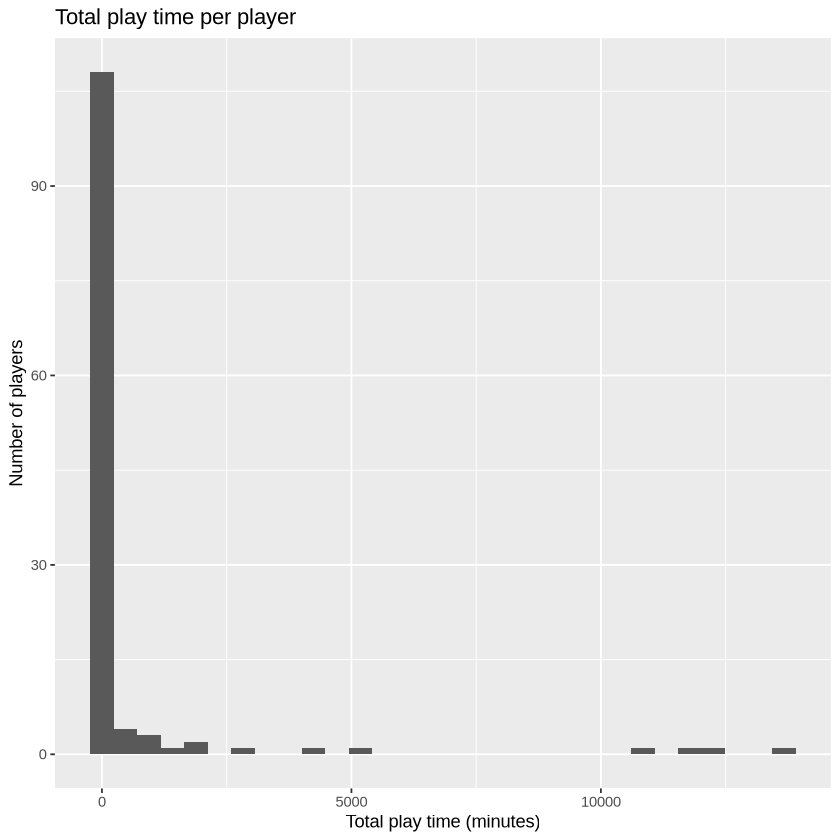

In [14]:
session_summary |>
  ggplot(aes(x = total_time_min)) +
  geom_histogram(bins = 30) +
  labs(title = "Total play time per player",
    x = "Total play time (minutes)",
    y = "Number of players" )


* The histogram shows that most players have relatively low total play time, while a small number of players play for much longer. This suggests that a few players contribute a large share of the total usage.

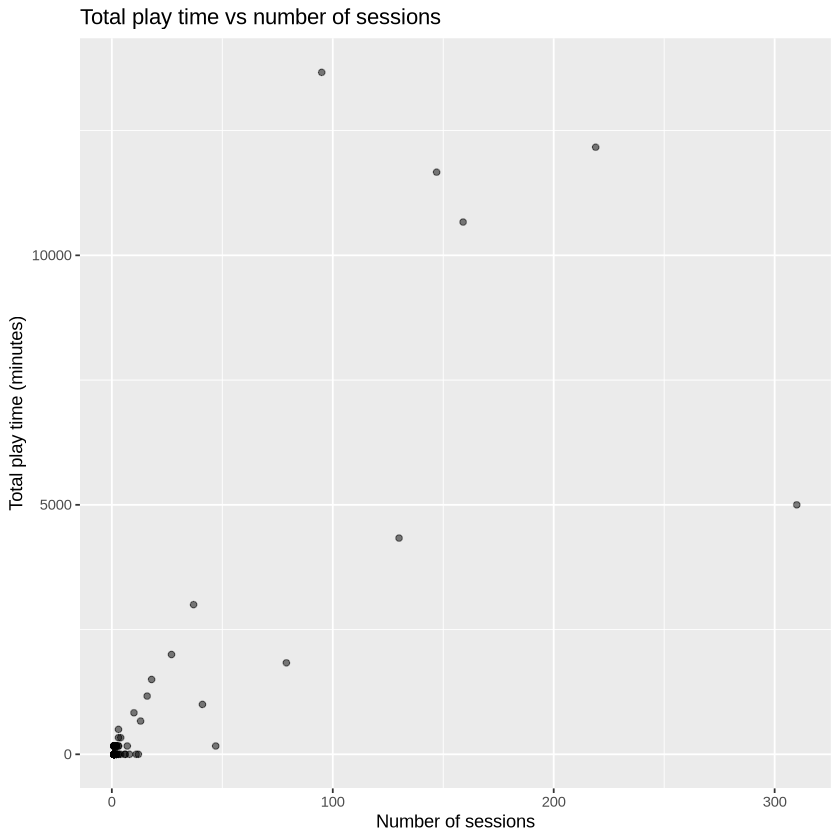

In [15]:
session_summary |>
  ggplot(aes(x = n_sessions, y = total_time_min)) +
  geom_point(alpha = 0.5) +
  labs(
    title = "Total play time vs number of sessions",
    x = "Number of sessions",
    y = "Total play time (minutes)")

* The scatterplot shows a clear positive relationship between total play time and the number of sessions. Players who have more sessions tend to accumulate much higher total play time.

(4) Methods and Plan

For the modelling stage of the project, I plan to use a simple linear regression model. The response will be each player’s total play time (total minutes on the server), and the predictors will include the usage summaries from `sessions.csv` such as number of sessions and average session length and player characteristics from `players.csv` like experience, played hours, age and gender.

Linear regression is appropriate here because the outcome we want to predict is a numeric quantity. The method is easy to understand and provides a simple equation that relates total play time to the predictors. The main assumptions are that the relationship between total play time and the predictors is approximately linear, that the variability of the errors is roughly constant, and that there are no extremely influential outliers. If these assumptions are badly violated, the model may not fit well, and I may need to transform variables or consider a different method in the group project.

Before modelling, I will clean negative or extremely long durations data, handling missing values, and constructing the player-level summaries. At a later stage, I will merge the usage summaries with player information using the `hashedEmail` key. I plan to randomly split players into a training set (about 70%) and a test set (about 30%). Model selection and checking will be carried out using cross-validation on the training set, and the final model will be evaluated on the held-out test set using appropriate regression metrics such as mean squared error. In this personal planning report I do not fit any models; I only describe the planned approach.